# Initialize Environment

In [1]:
try:
    %load_ext autoreload
    %autoreload 2
    
except:
    print 'NOT IPYTHON'

from __future__ import division
from IPython.display import display

import os
import sys
import glob
import json
import subprocess

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as io
import h5py
import matplotlib.pyplot as plt
from matplotlib import rcParams

import fig_plotting
rcParams = fig_plotting.update_rcparams(rcParams)

import scipy.stats as stats

os.chdir('../')
import Codebase
conv_adj_matr_to_cfg_matr = Codebase.Networks.configuration.convert_adj_matr_to_cfg_matr
conv_cfg_vec_to_adj_matr = Codebase.Networks.configuration.convert_conn_vec_to_adj_matr
os.chdir('./Analysis_Notebooks/')

path_CoreData = '/home/akhambhati/JagHome/hoth_research/CORE.fMRI_cogcontrol.medaglia'
path_PeriphData = '/home/akhambhati/JagHome/hoth_research/RSRCH.NMF_CogControl'
path_ExpData = path_PeriphData + '/e05-BehStat'

for path in [path_CoreData, path_PeriphData, path_ExpData]:
    if not os.path.exists(path):
        print('Path: {}, does not exist'.format(path))
        os.makedirs(path)

/home/akhambhati/Developer/miniconda2/envs/cb-nmfsubnet/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Path: /home/akhambhati/JagHome/hoth_research/RSRCH.NMF_CogControl/e05-BehStat, does not exist


# Load Behavioral Data

In [2]:
df_beh = io.loadmat('{}/BehavioralData_CogControlCorrect.mat'.format(path_CoreData))

stroop_lbl = [lbl[0] for lbl in df_beh['StroopLabels'][0]]
navon_lbl = [lbl[0] for lbl in df_beh['NavonLabels'][0]]
stroop_beh = df_beh['StroopCorrectOnly']
navon_beh = df_beh['NavonCorrectOnly']

bad_subj_ix = [1, 6]
good_subj_ix = np.setdiff1d(np.arange(stroop_beh.shape[0]), bad_subj_ix)

print('Stroop Labels: {}'.format(stroop_lbl))
print('Navon Labels: {}'.format(navon_lbl))

stroop_move = io.loadmat('{}/StroopMove.mat'.format(path_CoreData))['move'][:, 0]
navon_move = io.loadmat('{}/NavonMove.mat'.format(path_CoreData))['move'][:, 0]

Stroop Labels: [u'Total Accuracy', u'Interference Accuracy', u'NoInterference Accuracy', u'MeanRT', u'MedianRT', u'InterferenceMeanRT', u'InterferenceMedianRT', u'NoInterferenceMeanRT', u'NoInterferenceMedianRT', u'InterferenceMedianRTMinusMeanRT']
Navon Labels: [u'Total Accuracy', u'ShiftingAccuracy', u'NoShiftingAccuracy', u'MeanRT', u'MedianRT', u'ShiftingMeanRT', u'ShiftingMedianRT', u'NoShiftingMeanRT', u'NoShiftingMedianRT', u'ProportionTotalNonResponses']


# Compare Task Performance

WilcoxonResult(statistic=54.0, pvalue=0.00024117961055875132)


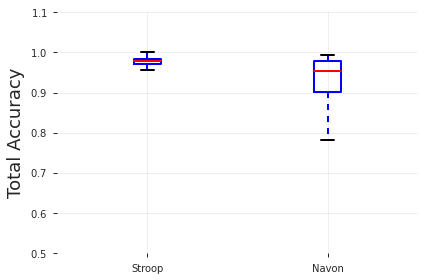

WilcoxonResult(statistic=0.0, pvalue=1.7343976283205784e-06)


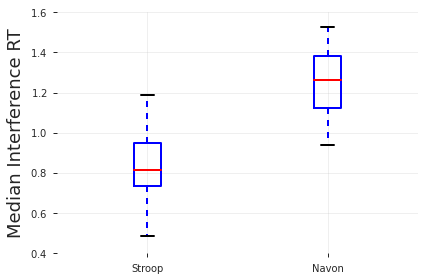

WilcoxonResult(statistic=0.0, pvalue=1.7343976283205784e-06)


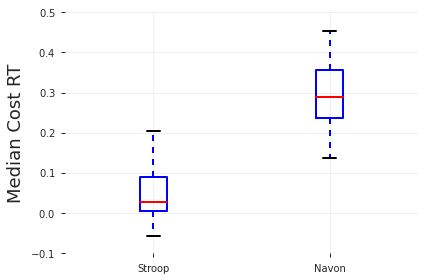

In [15]:
%matplotlib inline

plt.figure()
ax = plt.subplot(111)
print(stats.wilcoxon(stroop_beh[:, 0], navon_beh[:, 0]))
ax.boxplot([stroop_beh[:, 0], navon_beh[:, 0]])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('')
ax.set_xticklabels(['Stroop', 'Navon'])
ax.set_ylabel('Total Accuracy')
plt.show()

plt.figure()
ax = plt.subplot(111)
print(stats.wilcoxon(stroop_beh[:, 5], navon_beh[:, 5]))
ax.boxplot([stroop_beh[:, 5], navon_beh[:, 5]])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('')
ax.set_xticklabels(['Stroop', 'Navon'])
ax.set_ylabel('Median Interference RT')
plt.show()

plt.figure()
ax = plt.subplot(111)
print(stats.wilcoxon(stroop_beh[:, 5]-stroop_beh[:, 7], navon_beh[:, 5]-navon_beh[:, 7]))
ax.boxplot([stroop_beh[:, 5]-stroop_beh[:, 7], navon_beh[:, 5]-navon_beh[:, 7]])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('')
ax.set_xticklabels(['Stroop', 'Navon'])
ax.set_ylabel('Median Cost RT')
plt.show()
